In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time


Q1

For matrix multiplication:

**(MxN)x(NxK)**

- Each **row** of the first matrix multiplies with all **columns** of the second matrix, so the total number of row–column multiplications is: **(MxK)**

- In each row–column multiplication, there are \(n\) individual element multiplications, so the total number of multiplications is: **(MxKxN)**

- In each row–column multiplication, the \(n\) products are added together to form one element in the result. This requires \(n-1\) additions for each element, so the total number of additions is: **(MxKx(N-1))**


**Q2**


In [ ]:



def listmul(m,n):
    start=time.perf_counter()
    res=[]
    for i in range(len(m)-1,-1,-1):
        row=[]
        for j in range(len(n[1])-1,-1,-1):
            total=0
            for k in range(len(n)):
                total+=(m[i][k]*n[k][j])
            row.append(total)
        row.reverse()
        res.append(row)

    res.reverse()

    end=time.perf_counter()

    print(f"List of Lists time: {end-start} seconds")
    return res

def numpy_mul(m, n):
    m_n = np.array(m)
    n_n = np.array(n)

    start = time.perf_counter()
    result = np.matmul(m_n,n_n) 
    end = time.perf_counter()

    print(f"NumPy time: {end - start:.6f} seconds")
    return result


a=[[1,2,3],[2,3,4]]
b=[[1,2],[2,4],[1,6]]

res_list1=listmul(a,b)
res_numpy1=numpy_mul(a,b)


p, q, r = 300, 400, 200  
A = [[j for j in range(q)] for i in range(p)] #large matrices 
B = [[j for j in range(r)] for i in range(q)]

res_list2 = listmul(A, B)
res_numpy2 = numpy_mul(A, B)

# Check if results are the same
print("Results match?", np.allclose(res_list2, res_numpy2))


List of Lists time: 1.0599993402138352e-05 seconds
NumPy time: 0.000016 seconds
List of Lists time: 2.2653620000055525 seconds
NumPy time: 0.011838 seconds
Results match? True


The difference in times is considerable in large matrices, which are a common occurence in everyday ML applications

A reason I can think of is due to the Numpy framework being more close to the C++ core, and so its inherently faster than Python

**Q3**

The median is defined as the element in a list which lies in the middle of all the elements present in the list, when sorted. 

Using the method proposed in the question, we have to pass through the array ceil(n/2) times, for finding the median of the array. Also, the time complexity of each pass through an array is O(n), where n is the number of elements present in the array. 

The assumption I am making in this method is that in the kth pass of the array, we get the kth highest element, and then in the next pass compare the elements to find the element closest to it and smaller than it. To reach the median, which can be said as (n/2)th highest element in the array. Number of passes required would be then $$
\lceil \frac{N}{2} \rceil $$

So, the total time complexity would be:  

$$
O\big(N \cdot \lceil N/2 \rceil\big)
$$  

$$
\approx O(N^2)
$$

The better method I can think of right now, would be sorting the given array using Quick Sort, whose time complexity is O(N.log(N)), where N is the number of elements in the array. Then access the ceil(N/2)th element in the array. The accessing time in an array is a O(1) operation or a constant time complexity operation. So, the resultant time complexity would be: 
$$
O\big(N \cdot log(N)\big) + O(1) \\
~=O\big(N \cdot log(N)\big)
$$  

In [174]:
#Method 1
import math
def meth1(a):
    n=len(a)
    curr_max=-1
    better_max=max(a)
    bef_max=-1
    # print(better_max)
    s=time.perf_counter()
    for i in range((int)(n/2)):
        for i in range(n):
            if a[i]<better_max and a[i]>=curr_max:
                curr_max=a[i]
        bef_max=better_max
        better_max=curr_max
        
        # print(better_max)
        curr_max=-1
    e=time.perf_counter()
    print(f"time taken: {e-s}")

    if n%2==0:
        print(f"The median is : {(bef_max+better_max)/2}") 
    else:

        print(f"The median is: {better_max}") 



In [175]:
meth1([2,12,5,3,17,6])

time taken: 4.3000036384910345e-06
The median is : 5.5


In [172]:
#Method-2 
def meth2(a):
    s=time.perf_counter()
    a.sort()
    n=len(a)
    e=time.perf_counter()
    print(f"time taken: {e-s}")
    if n%2==0:
        print(f"The median is: {(a[(int)(n/2)]+a[(int)(n/2)-1])/2}")
    else:

        print(f"The median is: {a[(int)(n/2)]}")



In [173]:
meth2([2,12,5,3,17,6])

time taken: 1.4999823179095984e-06
The median is: 5.5


In [170]:
#Method 3 np.median
def meth3(a):
    s=time.perf_counter()
    a=np.median(a)
    e=time.perf_counter()
    print(f"The median is: {a}")
    print(f"time taken: {e-s}")



In [171]:
meth3([2,12,5,3,17,6])

The median is: 5.5
time taken: 0.00011729999096132815


LONGER ARRAYS

In [159]:
import random
a_long=[]
for i in range(1000):
    a_long.append(random.randint(1, 100))

In [160]:
meth1(a_long)
meth2(a_long)
meth3(a_long)

time taken: 0.02631620000465773
time taken: 6.229997961781919e-05
time taken: 0.0005824000108987093


**Q4**

Derivative with respect to \( x \):  

$$
\frac{\partial f}{\partial x} = 2xy + y^{3} \cos(x)
$$  

Derivative with respect to \( y \):  

$$
\frac{\partial f}{\partial y} = x^{2} + 3y^{2} \sin(x)
$$


**Q5** 

Using JAX, for calculating derivatives 

In [104]:
pip install jax

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.comNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 23.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/60.2 MB ? eta -:--:--
   ---- ----------------------------------- 6.3/60.2 MB 32.1 MB/s eta 0:00:02
   ------- -------------------------------- 10.7/60.2 MB 25.8 MB/s eta 0:00:02
   --------- ------------------------------ 14.4/60.2 MB 22.6 MB/s eta 0:00:03
   ------------ --------------------------- 19.1/60.2 MB 22.4 MB/s eta 0:00:02
   --------------- ------------------------ 23.3/60.2 MB 22.0 MB/s eta 0:00:02
   ------------------ --------------------- 27.5/60.2 MB 21.8 MB/s eta 0:00:02
   ---------------------- ----------------- 34.1/60.2 MB 23.0 MB/s eta 0:00:02
   --------------------------- ------------ 40.6/60.2 MB 24.1 MB/s eta 0:00:01
   -----------

In [84]:
import jax
import jax.numpy as jnp
from jax import grad

In [178]:
def f(x,y):
    return (x**2)*(y)+(y**3)*(jnp.sin(x))   #the same function

grad_x = grad(lambda x, y: f(x, y), argnums=0)   #deriv wrt which arg => x here
grad_y = grad(lambda x, y: f(x, y), argnums=1)  # deriv wrt y here

#eval at random values
val=np.random.default_rng(0)
for i in range(3):
    x_val=val.uniform(-5,5)
    y_val=val.uniform(-5,5)
    gx=grad_x(x_val, y_val)
    gy=grad_y(x_val, y_val)
    print(f"For these x and y:  x={x_val:.3f}, y={y_val:.3f}. The gradients are: grad_x={gx:.6f}, grad_y={gy:.6f}")

For these x and y:  x=1.370, y=-2.302. The gradients are: grad_x=-8.744123, grad_y=17.454630
For these x and y:  x=-4.590, y=-4.835. The gradients are: grad_x=58.152237, grad_y=90.671921
For these x and y:  x=3.133, y=4.128. The gradients are: grad_x=-44.456413, grad_y=10.268204


**Q6**

SYMPY - for symbolic representation of the derivatives

In [165]:
import sympy 

x,y=sympy.symbols('x y', real=True)

#the func
f=(x**2)*y+(y**3)*(sympy.sin(x))
do_f_do_x=sympy.diff(f,x)
do_f_do_y=sympy.diff(f,y)

print(f"partial diff wrt x: {do_f_do_x}")
print(f"partial diff wrt y: {do_f_do_y}" )

partial diff wrt x: 2*x*y + y**3*cos(x)
partial diff wrt y: x**2 + 3*y**2*sin(x)


Its the same

**Q7**

NESTED DICT=> im assuming the same dictionary format as mentioned in the q, with 2021 and 2022 filled with students and marks, while 2023-25 are empty, as they are for future uses.


In [114]:
dict={"2022":{"Branch 1":{},"Branch 2":{}},"2023":{"Branch 1":{},"Branch 2":{}},"2023":{"Branch 1":{},"Branch 2":{}},"2024":{"Branch 1":{},"Branch 2":{}},"2025":{"Branch 1":{},"Branch 2":{}}}

In [115]:
#a student dic is required to be made when addition of a student is required
stu1={"Name": "p1", "Marks":{"Maths":77, "English":88}}
stu2={"Name": "p2", "Marks":{"Maths":96, "English":99}}

dict["2022"]["Branch 1"][23110316]=stu1
dict["2022"]["Branch 1"][23110317]=stu2



In [116]:
dict

{'2022': {'Branch 1': {23110316: {'Name': 'p1',
    'Marks': {'Maths': 77, 'English': 88}},
   23110317: {'Name': 'p2', 'Marks': {'Maths': 96, 'English': 99}}},
  'Branch 2': {}},
 '2023': {'Branch 1': {}, 'Branch 2': {}},
 '2024': {'Branch 1': {}, 'Branch 2': {}},
 '2025': {'Branch 1': {}, 'Branch 2': {}}}

In [117]:
#accessing the info would be like
print(f"This guy's name is :{dict["2022"]["Branch 1"][23110316]["Name"]}")
print(f"Their marks in Math are :{dict["2022"]["Branch 1"][23110316]["Marks"]["Maths"]}")
print("Another guy")
print(f"This guy's name is :{dict["2022"]["Branch 1"][23110317]["Name"]}")
print(f"Their marks in Math are :{dict["2022"]["Branch 1"][23110317]["Marks"]["Maths"]}")


This guy's name is :p1
Their marks in Math are :77
Another guy
This guy's name is :p2
Their marks in Math are :96


In [119]:
#for other years a similar code can be written
stu_future={"Name":"p1_fut","Marks":{"Maths":89,"English":60}}
dict["2025"]["Branch 2"][25110316]=stu_future

print(f"Future guy: {dict["2025"]["Branch 2"][25110316]["Name"]}")
print(f"Future guy's marks: {dict["2025"]["Branch 2"][25110316]["Name"]}")

Future guy: p1_fut
Future guy's marks: p1_fut


**Q8**

In [183]:
#classes in python
class Student:
    def __init__(self,roll,name, marks):
        self.roll=roll
        self.name=name
        self.marks=marks

    def __repr__(self):  #when printing
        return f"Their roll number:{self.roll}, their name is : {self.name} and their marks are: {self.marks}"

        
s1=Student(1,"britney spears",{"Maths":88,"English":96})


In [184]:
print(s1)

Their roll number:1, their name is : britney spears and their marks are: {'Maths': 88, 'English': 96}


In [185]:
class Branch:
    def __init__(self,name):
        self.name=name
        self.students=[]
    
    def add_this_person(self,roll,name,marks):
        self.students.append(Student(roll,name,marks))

    def __repr__(self):
        return f"{self.name}: {self.students}"
    
    



In [186]:
b_1=Branch("Branch 1")
b_1.add_this_person(1,"westbrook",{"Maths":78,"English":66})
b_1.add_this_person(2,"LeBall",{"Maths":89,"English":90})

In [187]:
print(b_1)

Branch 1: [Their roll number:1, their name is : westbrook and their marks are: {'Maths': 78, 'English': 66}, Their roll number:2, their name is : LeBall and their marks are: {'Maths': 89, 'English': 90}]


In [188]:
class year:
    def __init__(self,year):
        self.year=year
        self.branches=[]
    
    def add_this_branch(self,branch):
        self.branches.append(branch)
    
    def __repr__(self):
        return f"{self.year}: {self.branches}"
    

y1=year(2022)
y1.add_this_branch(b_1)
print(y1)

2022: [Branch 1: [Their roll number:1, their name is : westbrook and their marks are: {'Maths': 78, 'English': 66}, Their roll number:2, their name is : LeBall and their marks are: {'Maths': 89, 'English': 90}]]


In [190]:
class s_dict:
    def __init__(self,name):
        self.name=name
        self.years=[]
    
    def add_this_year(self,year):
        self.years.append(year)

    def __repr__(self):
        return f"The years are: {self.years}"
    

schoo_dic=s_dict("ABC")
schoo_dic.add_this_year(y1)
print(schoo_dic)


The years are: [2022: [Branch 1: [Their roll number:1, their name is : westbrook and their marks are: {'Maths': 78, 'English': 66}, Their roll number:2, their name is : LeBall and their marks are: {'Maths': 89, 'English': 90}]]]


and so we can do

Q9

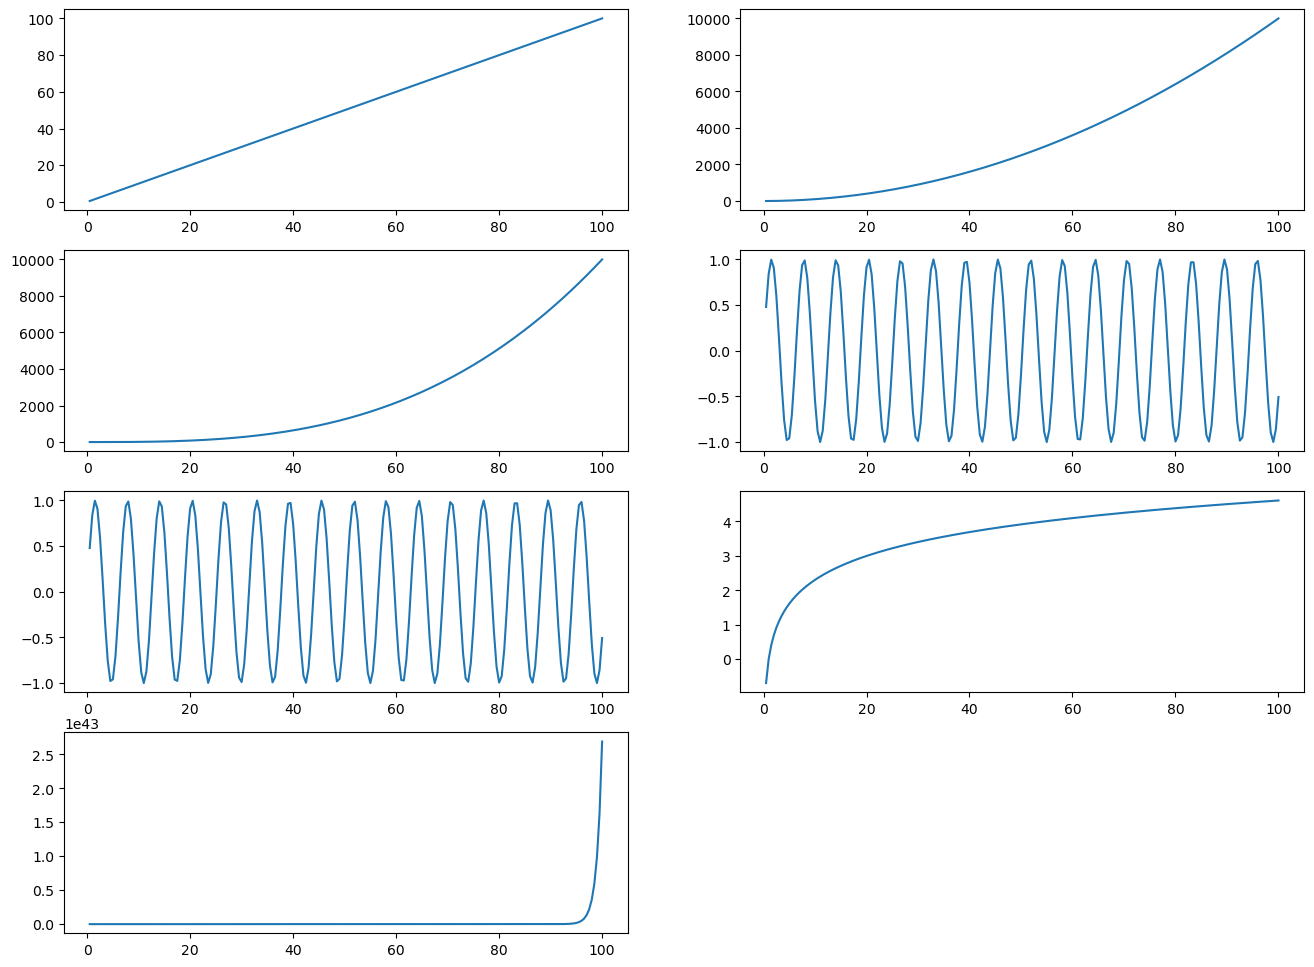

In [191]:


#1
x=np.arange(0.5,100.5,0.5)  #as it ignores the last one
y=np.arange(0.5,100.5,0.5)  #making y too


plt.figure(figsize=(16, 12))

plt.subplot(4,2,1)
plt.plot(x,x)

#2
y=x**2 # np

plt.subplot(4,2,2)

plt.plot(x,y)

#3
plt.subplot(4,2,3)

y=(x**3)/100
plt.plot(x,y)

#4
plt.subplot(4,2,4)
y=np.sin(x)

plt.plot(x,y)

#5
plt.subplot(4,2,5)
y=(np.sin(x))

plt.plot(x,y)

#6

plt.subplot(4,2,6)
y=np.log(x)
plt.plot(x,y)

#7

plt.subplot(4,2,7)
y=np.exp(x)
plt.plot(x,y)

plt.show()

**Q10**

In [194]:
#making the matrix
y=np.random.uniform(1,2,size=(20,5))

#initializing the cols with a list
ydf=pd.DataFrame(y,columns=["a","b","c","d","e"])

#finding the max std dev and means of all columns

std_devs=ydf.std()
max_std=std_devs.idxmax() 
print(f"Max standard deviation is of the column : {max_std}")

means=ydf.mean(axis=1)
max_mean=means.idxmin()
print(f"Min mean is of the row : {max_mean}")



Max standard deviation is of the column : d
Min mean is of the row : 7


**Q11**

In [ ]:
#col f
ydf["f"]=ydf.sum(axis=1) # axis=0 is along rows

ydf

,a,b,c,d,e,f
0,1.019833,1.868080,1.786455,1.361948,1.621720,7.658036
1,1.671751,1.013434,1.229214,1.452684,1.130537,6.497619
2,1.751720,1.090883,1.548255,1.745906,1.970519,8.107284
3,1.526276,1.715283,1.943772,1.920602,1.943771,9.049703
4,1.550170,1.813776,1.344553,1.791659,1.500531,8.000690
5,1.401050,1.087034,1.733695,1.404634,1.439154,7.065567
6,1.091224,1.966085,1.521547,1.639002,1.917657,8.135515
7,1.990245,1.278304,1.498221,1.938170,1.845146,8.550086
8,1.464168,1.355106,1.759178,1.891613,1.235593,7.705659
9,1.815964,1.890868,1.391635,1.751279,1.813204,8.662950


In [56]:


#col g
# ydf["g"]=ydf["f"]>8

ydf["g"]=ydf["f"].apply(lambda val:"LT8" if val<8 else "GT8") #applying this lambd fucntion over f col



ydf

,a,b,c,d,e,f,g
0,1.019833,1.868080,1.786455,1.361948,1.621720,7.658036,LT8
1,1.671751,1.013434,1.229214,1.452684,1.130537,6.497619,LT8
2,1.751720,1.090883,1.548255,1.745906,1.970519,8.107284,GT8
3,1.526276,1.715283,1.943772,1.920602,1.943771,9.049703,GT8
4,1.550170,1.813776,1.344553,1.791659,1.500531,8.000690,GT8
5,1.401050,1.087034,1.733695,1.404634,1.439154,7.065567,LT8
6,1.091224,1.966085,1.521547,1.639002,1.917657,8.135515,GT8
7,1.990245,1.278304,1.498221,1.938170,1.845146,8.550086,GT8
8,1.464168,1.355106,1.759178,1.891613,1.235593,7.705659,LT8
9,1.815964,1.890868,1.391635,1.751279,1.813204,8.662950,GT8


In [ ]:
ydf_g_lt8=ydf[ydf["g"]=="LT8"]
ydf_g_gt8=ydf[ydf["g"]=="GT8"]
#sum of rows
lt8_rows=(ydf["g"]=="LT8").sum()
print(lt8_rows)
print()

#lt8
std_f_lt8=ydf_g_lt8["f"].std()
print(std_f_lt8)
print()

#gt8

std_f_gt8=ydf_g_gt8["f"].std()
print(std_f_gt8)
print()

12

0.4807978098264697

0.3553710578225427



**Q12** 

broadcasting=> expansion of a matrix in one of the dimensions, when added with a matrix with more dimensions

In [153]:
m1=np.random.random(size=(2,2,1))
m2=np.random.random(size=(2,2,4))

print("M1: ")
print(f"{m1}\n")

print("M2: ")

print(f"{m2}\n")
m3=m1+m2
print("M3: ")

print(f"{m3}")

#can see it expanded/inflated to another dimension

M1: 
[[[0.37711041]
  [0.79554118]]

 [[0.96712869]
  [0.46448855]]]

M2: 
[[[0.33463689 0.74616688 0.89234615 0.67260044]
  [0.50295376 0.0467906  0.92698572 0.82279906]]

 [[0.7970337  0.02675887 0.81858857 0.41523222]
  [0.8675005  0.70756601 0.78785885 0.46222933]]]

M3: 
[[[0.7117473  1.12327728 1.26945656 1.04971085]
  [1.29849494 0.84233178 1.7225269  1.61834024]]

 [[1.7641624  0.99388757 1.78571726 1.38236092]
  [1.33198905 1.17205456 1.25234741 0.92671788]]]


**Q13** 

Argmin => gives the index of the minimum element in the array

In [88]:
def min_val(ex_arr):
    #initialize with first element just to assign a val
    min_arg=0
    min_v=ex_arr[0]
    for i in range(len(ex_arr)-1):
        if ex_arr[i]<min_v:
            min_arg=i

    return min_arg

In [89]:
x_arr=np.array([1,2,4,-1,5])
min_val(x_arr)

3

In [90]:
np.argmin(x_arr)

3

same result